이미지에 연산을 적용해 새로운 이미지나 정보를 얻어내고 싶을 때, 전체이미지를 대상으로 연산하는 것 보다 관심있는 부분만 추출해서 분석하는 것이 연산할 데이터의 양을 줄이고 수행시간을 단축시키며, 형태도 단순해지기에 적용해야 하는 알고리즈모 단순해짐.
이미지 연산은 항상 좌표를 기반으로 함. 그 영역이 작을때 상대적으로 더 구하기 쉬워짐.

관심영역 ROI (Region of interest)
- Numpy 배열은 row, column 순이므로 (height,width)로 설정해야함
- 파이썬 리스트 슬라이싱 > 새로운 객체 반환
- 넘파이 배열 슬라이싱 > 원본의 참조 반환. (copy()로 복사본만들고 실행)


In [6]:
import cv2
import numpy as np

img = cv2.imread("./sample/test2.jpg")

x= 320
y= 150
w = 50
h = 50

roi = img[y:y+h, x : x+w]
print(roi.shape)

cv2.rectangle(roi, (0,0), (h-1, w-1), (0,255,0))
cv2.imshow("test", img)

cv2.waitKey(0)
cv2.destroyAllWindows()

(50, 50, 3)


In [7]:
import cv2
import numpy as np

img = cv2.imread('./sample/test2.jpg')

x=320; y=150; w=50; h=50
roi = img[y:y+h, x:x+w]     # roi 지정
img2 = roi.copy()           # roi 배열 복제 ---①

img[y:y+h, x+w:x+w+w] = roi # 새로운 좌표에 roi 추가, 태양 2개 만들기
cv2.rectangle(img, (x,y), (x+w+w, y+h), (0,255,0)) # 2개의 태양 영역에 사각형 표시

cv2.imshow("img", img)      # 원본 이미지 출력
cv2.imshow("roi", img2)     # roi 만 따로 출력

cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
import cv2
import numpy as np

isDragging = False                      
x0, y0, w, h = -1,-1,-1,-1            
blue, red = (255,0,0),(0,0,255)          

def onMouse(event,x,y,flags,param):     
    global isDragging, x0, y0, img      
    if event == cv2.EVENT_LBUTTONDOWN:  
        isDragging = True
        x0 = x
        y0 = y
    elif event == cv2.EVENT_MOUSEMOVE:  
        if isDragging:                  
            img_draw = img.copy()       
            cv2.rectangle(img_draw, (x0, y0), (x, y), blue, 2) 
            cv2.imshow('img', img_draw)
    elif event == cv2.EVENT_LBUTTONUP:  
        if isDragging:                  
            isDragging = False          
            w = x - x0                  
            h = y - y0                  
            print("x:%d, y:%d, w:%d, h:%d" % (x0, y0, w, h))
            if w > 0 and h > 0:         
                img_draw = img.copy()   
                
                cv2.rectangle(img_draw, (x0, y0), (x, y), red, 2) 
                cv2.imshow('img', img_draw) 
                roi = img[y0:y0+h, x0:x0+w] 
                cv2.imshow('cropped', roi)  
                cv2.moveWindow('cropped', 0, 0) 
                cv2.imwrite('./sample/cropped.jpg', roi)  
                print("croped.")
            else:
                cv2.imshow('img', img)  
                print("좌측 상단에서 우측 하단으로 영역을 드래그 하세요.")

img = cv2.imread('./sample/test2.jpg')
cv2.imshow('img', img)
cv2.setMouseCallback('img', onMouse) 
cv2.waitKey()
cv2.destroyAllWindows()

x:452, y:261, w:-214, h:-80
좌측 상단에서 우측 하단으로 영역을 드래그 하세요.
x:454, y:302, w:-295, h:-80
좌측 상단에서 우측 하단으로 영역을 드래그 하세요.
x:371, y:404, w:-41, h:-15
좌측 상단에서 우측 하단으로 영역을 드래그 하세요.
x:89, y:580, w:-26, h:-20
좌측 상단에서 우측 하단으로 영역을 드래그 하세요.
x:50, y:74, w:-2, h:-9
좌측 상단에서 우측 하단으로 영역을 드래그 하세요.
x:61, y:63, w:-9, h:-5
좌측 상단에서 우측 하단으로 영역을 드래그 하세요.
x:26, y:22, w:-9, h:-3
좌측 상단에서 우측 하단으로 영역을 드래그 하세요.
x:253, y:129, w:4, h:2
croped.
x:306, y:242, w:107, h:123
croped.
x:296, y:399, w:63, h:48
croped.
x:424, y:203, w:240, h:194
croped.
x:39, y:34, w:564, h:577
croped.
x:339, y:408, w:85, h:94
croped.
x:522, y:248, w:22, h:30
croped.
x:542, y:280, w:-144, h:-74
좌측 상단에서 우측 하단으로 영역을 드래그 하세요.


위에 마우스 이벤트 코드를 selectROI로 관심영역 지정을 할 수 있움

In [8]:
import cv2,  numpy as np

img = cv2.imread('./sample/test2.jpg')

x,y,w,h = cv2.selectROI('imgaa', img, False) 

if w and h:
    roi = img[y:y+h, x:x+w]
    cv2.imshow('cropped', roi)  # ROI 지정 영역을 새창으로 표시
    cv2.moveWindow('cropped', 0, 0) # 새창을 화면 좌측 상단에 이동
    cv2.imwrite('./cropped2.jpg', roi)   # ROI 영역만 파일로 저장

cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.5.3) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-u4kjpz2z\opencv\modules\highgui\src\window_w32.cpp:1500: error: (-27:Null pointer) NULL window: 'cropped3' in function 'cvMoveWindow'


In [32]:
a = np.array([[[0,0,255]]])
print(a.shape)
print(a[0][0][2])

b= np.array([[[111,[255,255]]]])
print(b.shape)
print(b[0][0])

(1, 1, 3)
255
(1, 1, 2)
[111 list([255, 255])]


<ipython-input-32-bdcb46bc04c6>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  b= np.array([[[111,[255,255]]]])


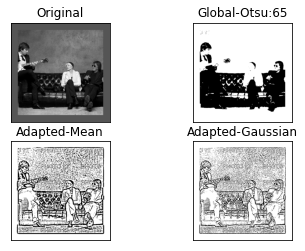

In [21]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 

blk_size =13       # 블럭 사이즈
C =4       # 차감 상수 
img = cv2.imread('./sample/test2.jpg', cv2.IMREAD_GRAYSCALE) # 그레이 스케일로  읽기

# ---① 오츠의 알고리즘으로 단일 경계 값을 전체 이미지에 적용
ret, th1 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# ---② 어뎁티드 쓰레시홀드를 평균과 가우시안 분포로 각각 적용
th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                      cv2.THRESH_BINARY, blk_size, C)
th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                     cv2.THRESH_BINARY, blk_size, C)

# ---③ 결과를 Matplot으로 출력
imgs = {'Original': img, 
        'Global-Otsu:%d' %ret :th1, 
        'Adapted-Mean':th2,
        'Adapted-Gaussian': th3}

for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(2,2,i+1)
    plt.title(k)
    plt.imshow(v,'gray')
    plt.xticks([]),plt.yticks([])

plt.show()

스레시홀딩 할 때에는
적응형 스레시홀드를 적용해야하고 (오츠의 알고리즘은 전역적이고 모든 경계값을 조사하느라 속도가 느리고,노이즈가 있는 영상에서는 별도움안됌) 적응형 스레시홀드를 평균으로 적용하거나 가우시안 분포로 사용함.
조명이 일정하지 않거나 배경색이 여러가지거나 했을때, 이미지를 여러 영역으로 나누어 그 주변 픽셀값만 가지고 계산을해서 경계값을 구함.
(지역적 적용이 bb)

